In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("C:/Users/ASUS/Documents/GitHub/IntroductionToMachineLearning/Week13/Mall_Customers.csv")

In [3]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
x=dataset.iloc[:,[3,4]].values #iki nota tüm satir 3,4 sutun

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

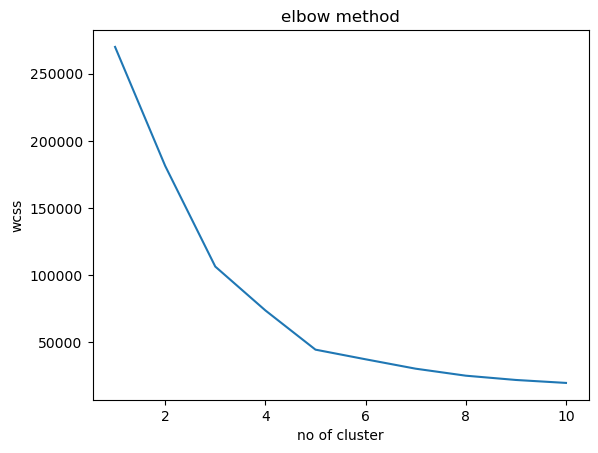

In [10]:
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show()

In [11]:
kmeansmodel=KMeans(n_clusters=5,init="k-means++",random_state=0)
y_kmeans=kmeansmodel.fit_predict(x)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


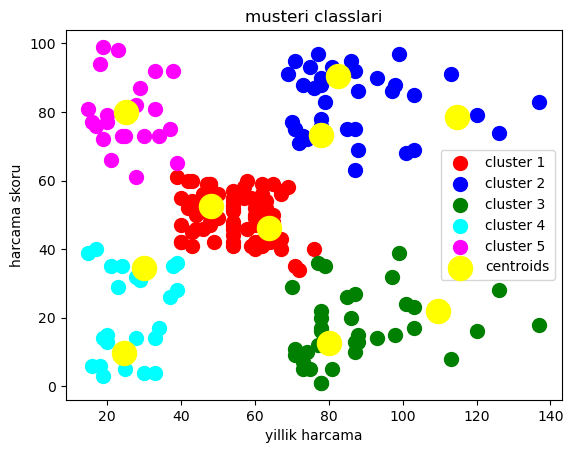

In [12]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c="red",label="cluster 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c="blue",label="cluster 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c="green",label="cluster 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c="cyan",label="cluster 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c="magenta",label="cluster 5")



plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="centroids")

plt.title("musteri classlari")
plt.xlabel("yillik harcama")
plt.ylabel("harcama skoru")
plt.legend()
plt.show()